Few things to note about Lasso regression model:
- It's short for Least Absolute Shrinkage and Selection Operator(LASSO)
- It's a supervised learning model which is used in regression problems
- It's built on top of the linear regression model, the only difference is that it implements L1 regularization to the cost function 
to prevent/reduce overfitting
- When we talk about regularization, it simply means reducing the magnitude of model parameters, especially those which have little effect
in our predictions. Usually the model complex our model is(more parameters/features), the higher the chances of overfitting. This process of
reducing model parameters is known as 'SHRINKAGE' and the process of reducing the parameters unimportant features to or close to zero is called
'FEATURE SELCTION'. Hence the terms shrinkage and selection in the full meaning of the acronym LASSO

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

Data Collection

In [4]:
salary_data = pd.read_csv('C:\\Users\\admin\\Documents\\My books\\Machine Learning Pathway\\Datasets\\salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Data Pre-processing and Analysis

In [5]:
# Checking the shape of the dataset

salary_data.shape

(30, 2)

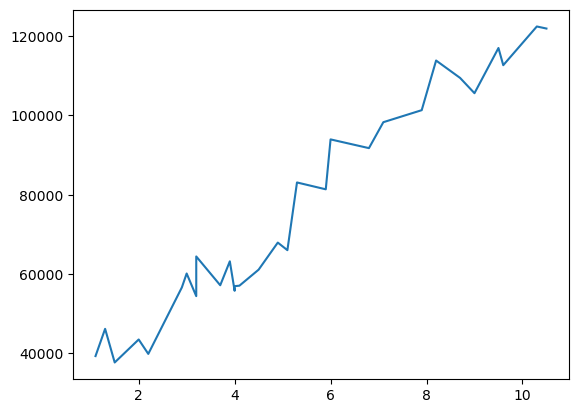

In [7]:
# Visualizing the correlation between the years of experience and the salary

x= salary_data['YearsExperience']
y = salary_data['Salary']

%matplotlib inline
plt.plot(x,y)

In [10]:
# Seperating the dataset into the data and target

data = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

target

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

Seperating the data into training and test data

In [11]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.33, random_state=2)
print(data.shape, train_data.shape, test_data.shape)

(30, 1) (20, 1) (10, 1)


Model development

In [22]:
class LassoRegression():

    # Init function for initiating the hyperparameters of the model
    def __init__(self, learning_rate, no_of_iterations, reg_parameter):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.reg_parameter = reg_parameter


    # For fitting our model with our training data which will be used to determine model parameters
    def fit(self, x, y):

        # Initiating the number of datapoints and features in the dataset
        self.nd, self.nf = x.shape


        # Initiating model parameters
        self.w = np.zeros(self.nf)
        self.b = 0
        self.x = x
        self.y = y

        # Implementing Gradient Descent
        for j in range(self.no_of_iterations):
            self.update_parameters()


    # For updating the model parameters for each iteration over the data
    def update_parameters(self):

        # Initializing the linear equation
        y_hat = self.predict(self.x)

        # Finding the gradients(dw and db)
        dw = np.ones(self.nf)

        for j in range(self.nf):
            condition = self.w[j] > 0

            if condition is True:      
                dw[j] = (-(2 * (self.x[:,j].dot(self.y - y_hat)) + self.reg_parameter))/self.nd
                
            else:
                dw[j] = (-(2 * (self.x[:,j].dot(self.y - y_hat)) - self.reg_parameter))/self.nd

        db = (-2 * np.sum(self.y - y_hat))/self.nd


        # Updating the weights and bias 
        self.w = self.w - (self.learning_rate * dw)
        self.b = self.b - (self.learning_rate * db)


    # For predicting the target when given a dataset
    def predict(self, x):
        return x.dot(self.w) + self.b 

Model Training

In [23]:
# loading an instance of the Lasso Regression model

lasso = LassoRegression(0.001, 1000, 0.01)

In [24]:
# fitting the model with training data

lasso.fit(train_data, train_target)

Model Evaluation

In [26]:
# Model evaluation on the training data using R squared error

train_data_prediction = lasso.predict(train_data)
train_data_accuracy = r2_score(train_target, train_data_prediction)
train_data_accuracy

0.9135636994167406

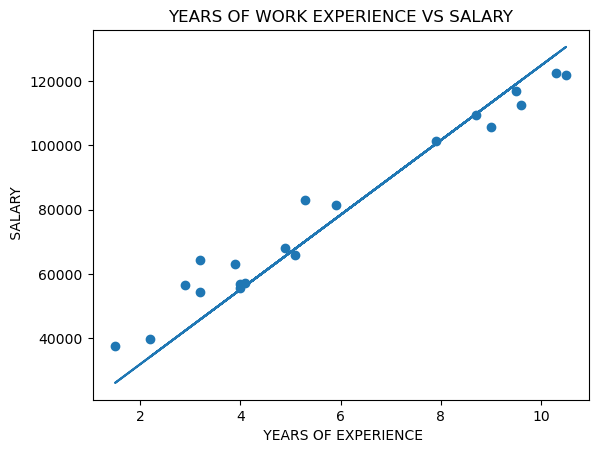

In [27]:
# Model evaluation on the training data by visualizing original salary and the estimated salary

%matplotlib inline
plt.scatter(train_data, train_target)
plt.plot(train_data, train_data_prediction)
plt.xlabel(' YEARS OF EXPERIENCE')
plt.ylabel(' SALARY')
plt.title('YEARS OF WORK EXPERIENCE VS SALARY')
plt.show()

In [28]:
# Model evaluation on the test data using R squared error

test_data_prediction = lasso.predict(test_data)
test_data_accuracy = r2_score(test_target, test_data_prediction)
test_data_accuracy

0.7356537093168775

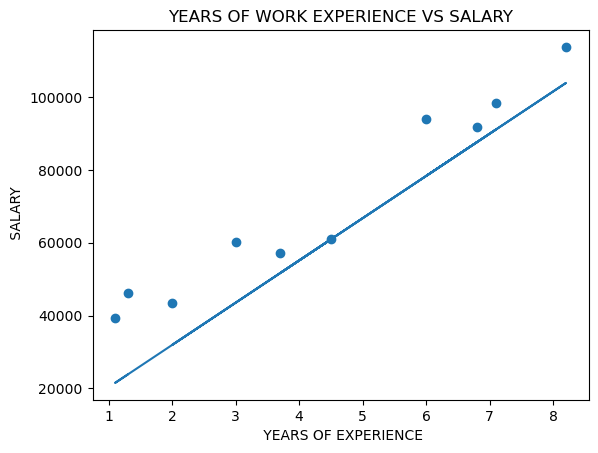

In [29]:
# Model evaluation on the test data by visualizing original salary and the estimated salary

%matplotlib inline
plt.scatter(test_data, test_target)
plt.plot(test_data, test_data_prediction)
plt.xlabel(' YEARS OF EXPERIENCE')
plt.ylabel(' SALARY')
plt.title('YEARS OF WORK EXPERIENCE VS SALARY')
plt.show()

Comparing The Accuracy of the Model with the Inbuilt Lasso Regression Model in Sklearn

In [32]:
# Loading the sklearn lasso regression model

s_lasso = Lasso()

In [33]:
# fitting the model with our training data

s_lasso.fit(train_data, train_target)

Lasso()

In [34]:
# finding the accuracy of the model on training data

train_data_prediction1 = s_lasso.predict(train_data)
train_data_accuracy1 = r2_score(train_target, train_data_prediction1)
train_data_accuracy1

0.9716432513296134

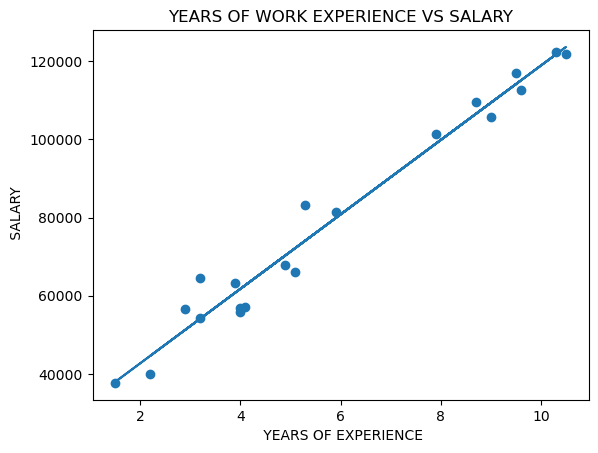

In [35]:
# Model evaluation on the training data by visualizing original salary and the estimated salary

%matplotlib inline
plt.scatter(train_data, train_target)
plt.plot(train_data, train_data_prediction1)
plt.xlabel(' YEARS OF EXPERIENCE')
plt.ylabel(' SALARY')
plt.title('YEARS OF WORK EXPERIENCE VS SALARY')
plt.show()

In [36]:
# Model evaluation on the test data using R squared error

test_data_prediction1 = s_lasso.predict(test_data)
test_data_accuracy1 = r2_score(test_target, test_data_prediction1)
test_data_accuracy1

0.9041817142395875

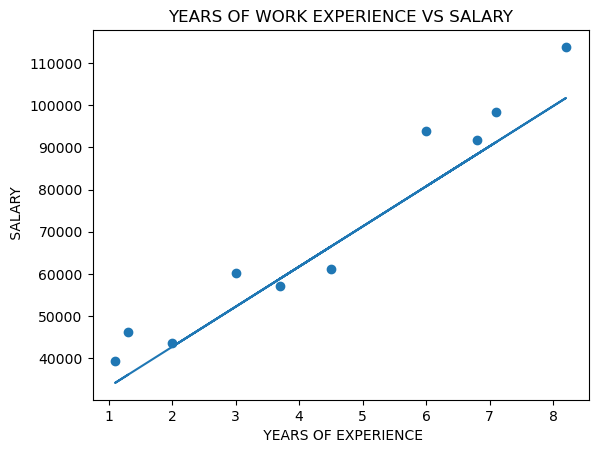

In [44]:
# Model evaluation on the test data by visualizing original salary and the estimated salary

%matplotlib inline
plt.scatter(test_data, test_target)
plt.plot(test_data, test_data_prediction1)
plt.xlabel(' YEARS OF EXPERIENCE')
plt.ylabel(' SALARY')
plt.title('YEARS OF WORK EXPERIENCE VS SALARY')
plt.show()

In [37]:
s_lasso.coef_

array([9512.82110681])

In [39]:
lasso.w

array([11610.09531757])

In [42]:
s_lasso.intercept_

23708.52989708601

In [43]:
lasso.b

8718.578276282238